In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import ast
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [103]:
df_filter = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [105]:
df_filter = df_filter.dropna(subset='salary_year_avg')

In [106]:
df_skills = df_filter.explode('job_skills')

In [107]:
df_groupby = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [113]:
df_salary_sort = df_groupby.sort_values(by='median', ascending=False).head(10)
df_salary_sort

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [114]:
df_top_skills = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_top_skills = df_top_skills.sort_values(by='count', ascending=False).head(10)
df_top_skills = df_top_skills.sort_values(by='median', ascending=False)

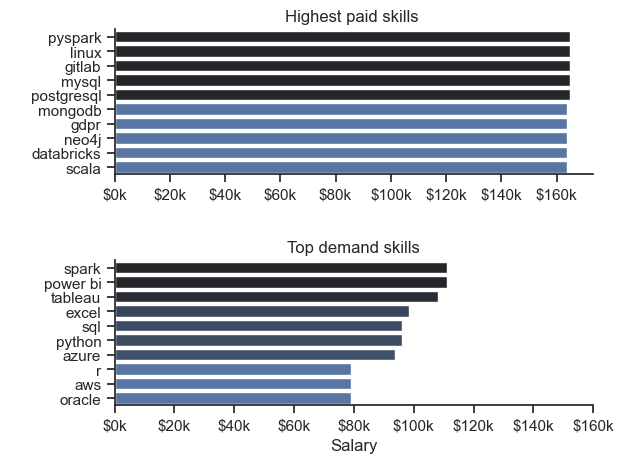

In [115]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

sns.barplot(data=df_salary_sort, x='median', y=df_salary_sort.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
ax[0].set_title('Highest paid skills ')
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))


sns.barplot(data=df_top_skills, x='median', y=df_top_skills.index, ax=ax[1], hue='median', palette='dark:b_r', legend=False)
ax[1].set_title('Top demand skills')
ax[1].set_xlabel('Salary')
ax[1].set_ylabel(' ')
ax[1].set_xlim(0,160000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))

fig.tight_layout()
sns.despine()

165000.0